In [1]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import timedelta
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
from sklearn.metrics import f1_score



In [2]:
raw_data = pd.read_csv('../Data/santander-customer-transaction-prediction/train.csv')
raw_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
raw_data.dtypes.value_counts()

float64    200
object       1
int64        1
Name: count, dtype: int64

In [4]:
raw_data['target'].dtype

dtype('int64')

In [5]:
raw_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
raw_data.drop('ID_code', axis=1, inplace=True)

In [8]:
x = raw_data.drop(['target'], axis=1)
y = raw_data['target']

In [9]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
y_train.value_counts()

target
0    143886
1     16114
Name: count, dtype: int64

In [11]:
roc_curves = []

def plot_roc_curve(y_test, y_proba, model_name):
    global roc_curves
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_curves.append((fpr, tpr, roc_auc, model_name))
    plt.figure()
    for fpr, tpr, roc_auc, model_name in roc_curves:
        plt.plot(fpr, tpr, label=f'{model_name}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
auc_scores =[]
def plot_auc_bar_chart(auc_score, model_name):
    global auc_scores
    auc_scores.append((auc_score, model_name))
    models = [model for _, model in auc_scores]
    scores = [score for score, _ in auc_scores]

    plt.figure(figsize=(10, 10))
    plt.bar(models, scores, color='navy')
    plt.xlabel('Models')
    plt.ylabel('AUC Score')
    plt.title('AUC Scores for Different Models')
    plt.ylim(0, 1)  # AUC scores range from 0 to 1
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [13]:
def plot＿confusion＿matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x＿train)
x_test = scaler.transform(x_test)

In [15]:
var_thresh = VarianceThreshold(threshold=0.01)
x_train = var_thresh.fit_transform(x_train)
x_test = var_thresh.transform(x_test)

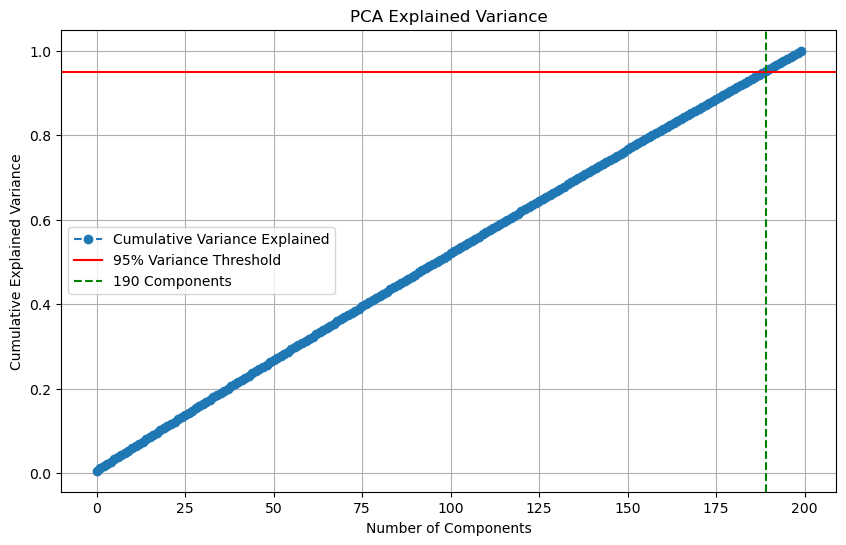

Selected number of components: 190
Cumulative explained variance for 190 components: 0.9531


In [16]:


def perform_pca(x_train, x_test, threshold=0.95, random_state=42):
    pca = PCA(random_state=random_state)
    pca.fit(x_train)
    var_ratio_sum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(var_ratio_sum >= threshold) + 1
    pca_reduced = PCA(n_components=n_components, random_state=random_state)
    x_train_pca = pca_reduced.fit_transform(x_train)
    x_test_pca = pca_reduced.transform(x_test)


    plt.figure(figsize=(10, 6))
    plt.plot(var_ratio_sum, marker='o', linestyle='--', label='Cumulative Variance Explained')
    plt.axhline(y=threshold, color='r', linestyle='-', label=f'{threshold*100:.0f}% Variance Threshold')
    plt.axvline(x=n_components - 1, color='g', linestyle='--', label=f'{n_components} Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.legend()
    plt.grid()
    plt.show()


    print(f"Selected number of components: {n_components}")
    print(f"Cumulative explained variance for {n_components} components: {var_ratio_sum[n_components-1]:.4f}")
    
    return x_train_pca, x_test_pca, pca_reduced

x_train_pca, x_test_pca, pca_model = perform_pca(x_train, x_test, threshold=0.95)


In [17]:
x_train_pca.shape

(160000, 190)

R2 Score: -1.4450868779426904


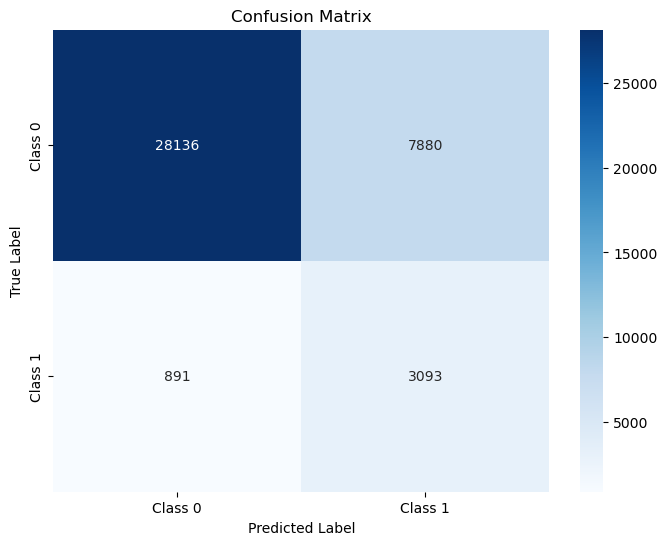

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     36016
           1       0.28      0.78      0.41      3984

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



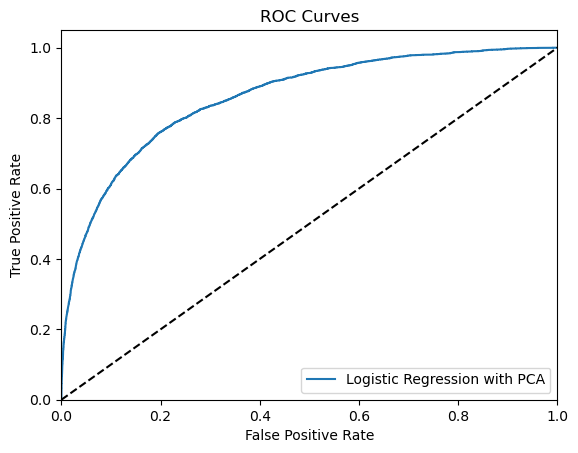

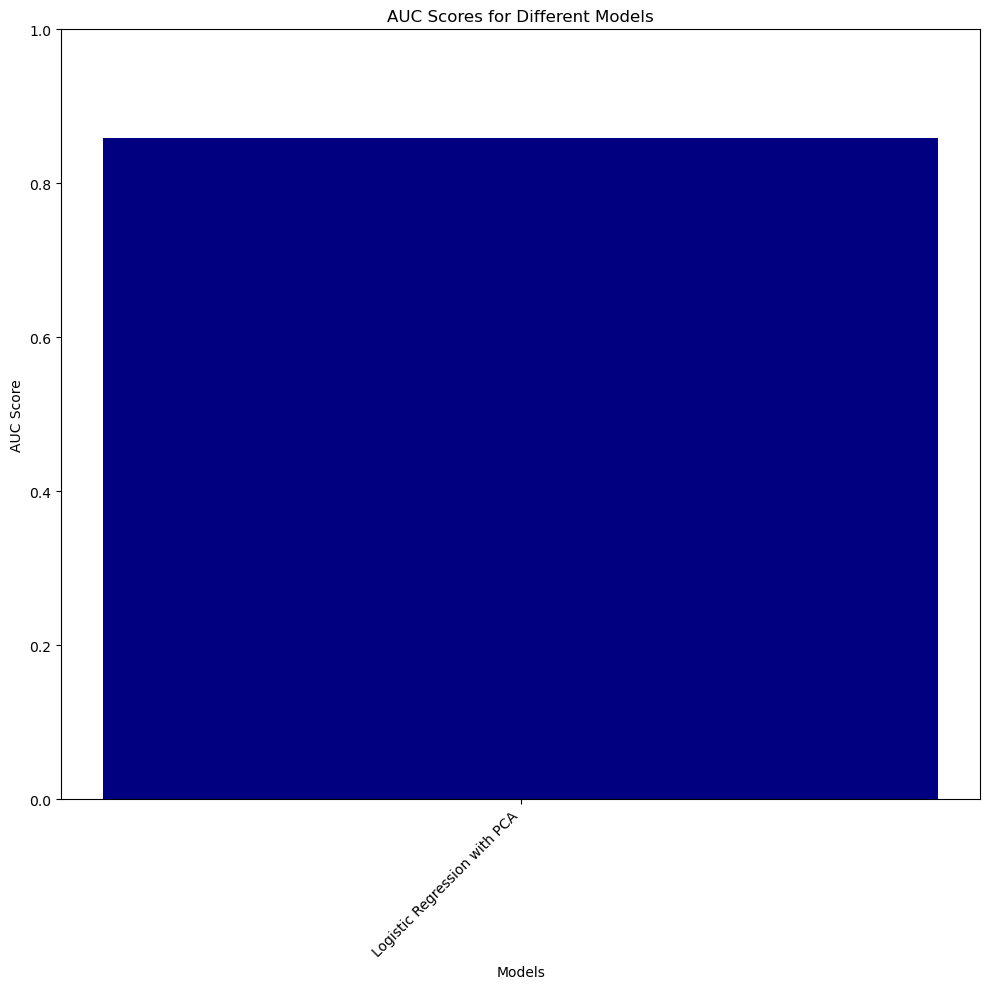

In [18]:

logisticRegression = LogisticRegression(random_state=43
                                        ,
    n_jobs=-1,class_weight='balanced')
logisticRegression.fit(x_train_pca, y_train)

log_y_pre = logisticRegression.predict(x_test_pca)
log_y_proba = logisticRegression.predict_proba(x_test_pca)[:, 1]
log_confusion_matrix = confusion_matrix(y_test, log_y_pre)
log_accuracy = accuracy_score(y_test, log_y_pre)
log_f1_score = f1_score(y_test, log_y_pre, average='weighted')
log_pre = precision_score(y_test, log_y_pre, average='weighted')
log_recall = recall_score(y_test, log_y_pre, average='weighted')
log_roc_auc = roc_auc_score(y_test, log_y_proba)
log_r2_score = r2_score(y_test, log_y_pre)

print("R2 Score:", log_r2_score)
plot_confusion_matrix(log_confusion_matrix)
print("Classification Report:\n", classification_report(y_test, log_y_pre))
plot_roc_curve(y_test, log_y_proba, 'Logistic Regression with PCA')
plot_auc_bar_chart(log_roc_auc, 'Logistic Regression with PCA')
 


R2 Score: -1.435608716518674
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     36016
           1       0.28      0.78      0.41      3984

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



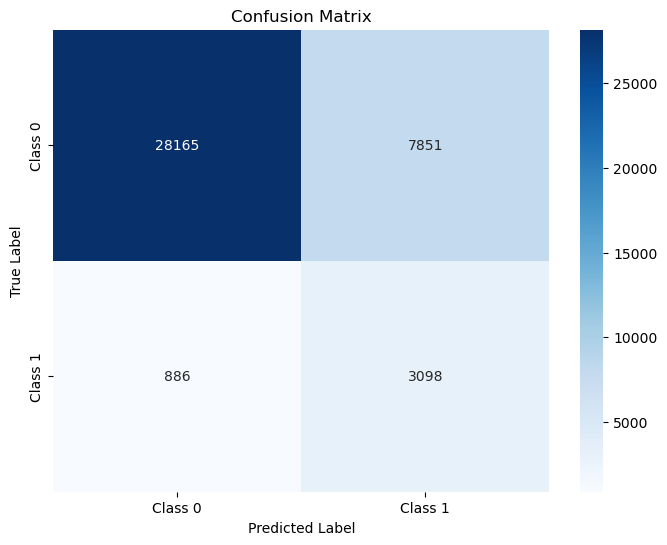

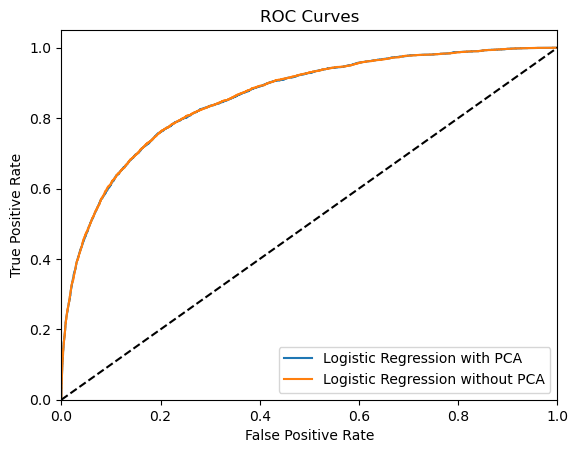

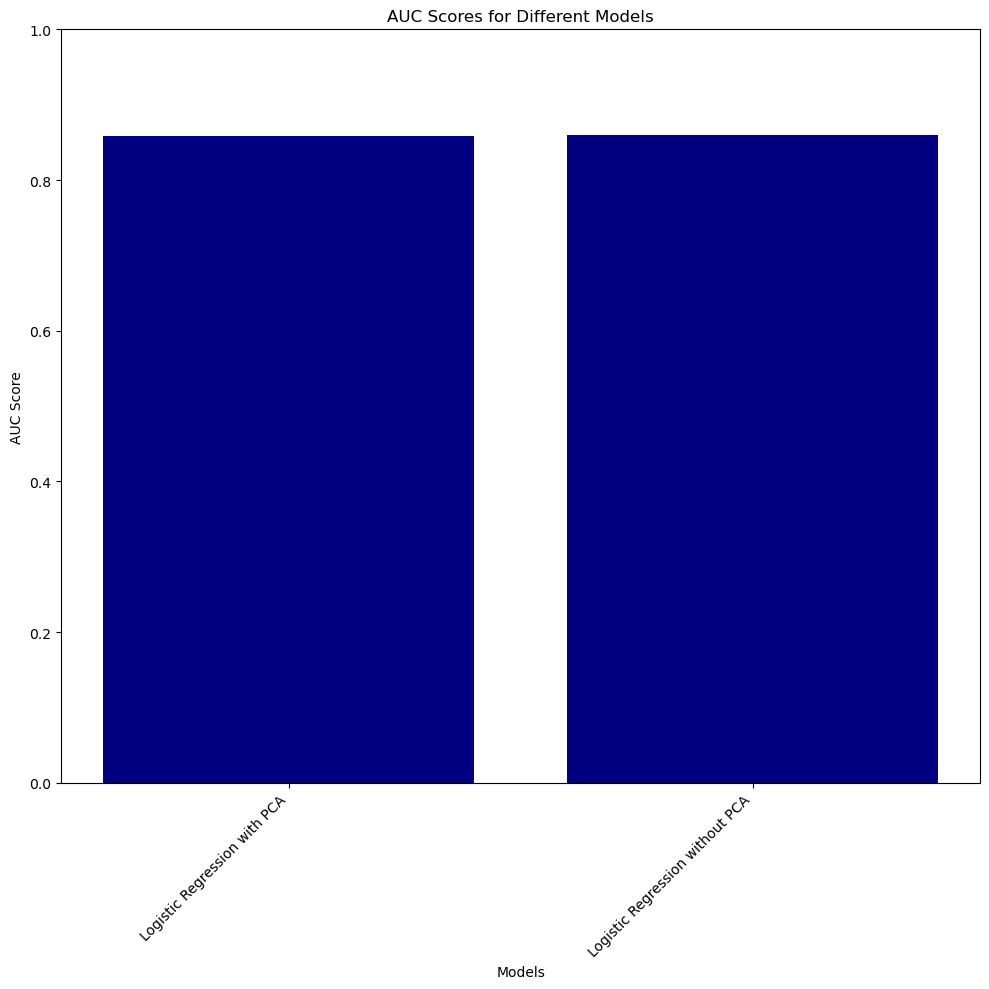

In [19]:
#Logistic without pca
logisticRegression_wopca = LogisticRegression(random_state=6,
    n_jobs=-1,class_weight='balanced')
logisticRegression_wopca.fit(x_train, y_train)

log_y_pre_wopca = logisticRegression_wopca.predict(x_test)
log_y_proba_wopca = logisticRegression_wopca.predict_proba(x_test)[:, 1]
log_confusion_matrix_wopca = confusion_matrix(y_test, log_y_pre_wopca)
log_accuracy_wopca = accuracy_score(y_test, log_y_pre_wopca)
log_f1_score_wopca = f1_score(y_test, log_y_pre_wopca, average='weighted')
log_pre_wopca = precision_score(y_test, log_y_pre_wopca, average='weighted')
log_recall_wopca = recall_score(y_test, log_y_pre_wopca, average='weighted')
log_roc_auc_wopca = roc_auc_score(y_test, log_y_proba_wopca)
log_r2_score_wopca = r2_score(y_test, log_y_pre_wopca)

print("R2 Score:", log_r2_score_wopca)
print("Classification Report:\n", classification_report(y_test, log_y_pre_wopca))
plot_confusion_matrix(log_confusion_matrix_wopca)
plot_roc_curve(y_test, log_y_proba_wopca, 'Logistic Regression without PCA')
plot_auc_bar_chart(log_roc_auc_wopca, 'Logistic Regression without PCA')
 


Random Forest ROC-AUC:  82.95279699986085
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     36016
           1       0.28      0.78      0.41      3984

    accuracy                           0.78     40000
   macro avg       0.62      0.78      0.63     40000
weighted avg       0.90      0.78      0.82     40000



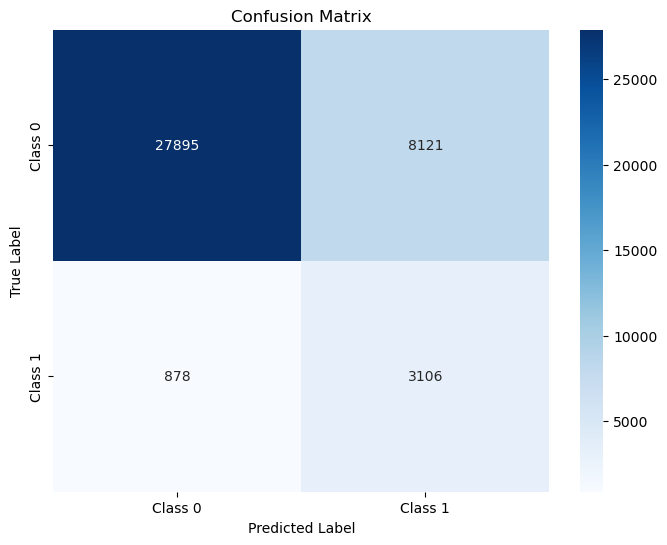

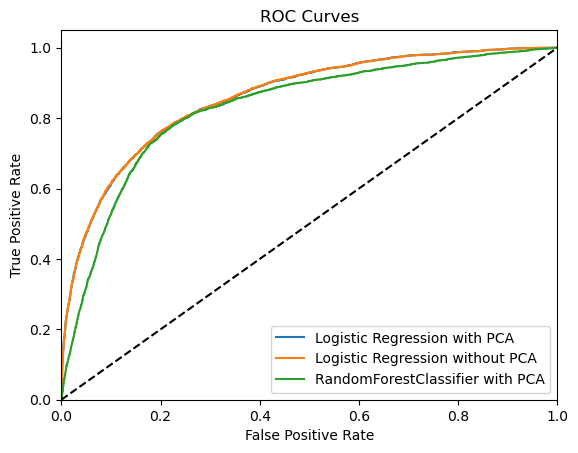

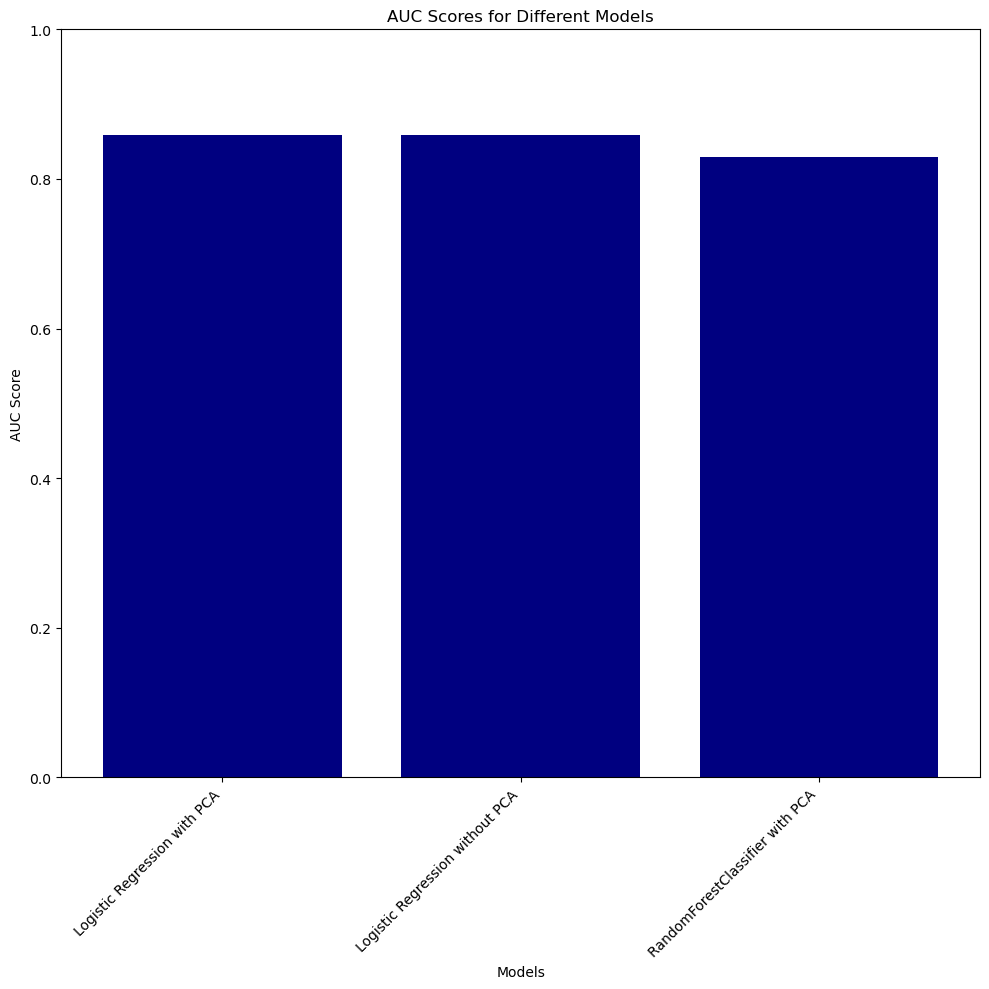

In [20]:
#RandomForest with PCA

randomForestClassifier = RandomForestClassifier(
    random_state=40,
    max_features='log2',
    max_depth=10,
    n_jobs=-1,
    n_estimators=300,
    class_weight={0: 1, 1: 10}  
)
randomForestClassifier.fit(x_train_pca, y_train)
rf_y_pred = randomForestClassifier.predict(x_test_pca)
rf_y_proba = randomForestClassifier.predict_proba(x_test_pca)[:, 1]


rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
roc_auc = roc_auc_score(y_test, rf_y_proba)

print("Random Forest ROC-AUC: ", roc_auc*100)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(rf_confusion_matrix)
plot_roc_curve(y_test, rf_y_proba, 'RandomForestClassifier with PCA')
plot_auc_bar_chart(roc_auc, 'RandomForestClassifier with PCA')



Random Forest ROC-AUC:  0.809917807335517
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     36016
           1       0.29      0.62      0.40      3984

    accuracy                           0.81     40000
   macro avg       0.62      0.73      0.64     40000
weighted avg       0.89      0.81      0.84     40000



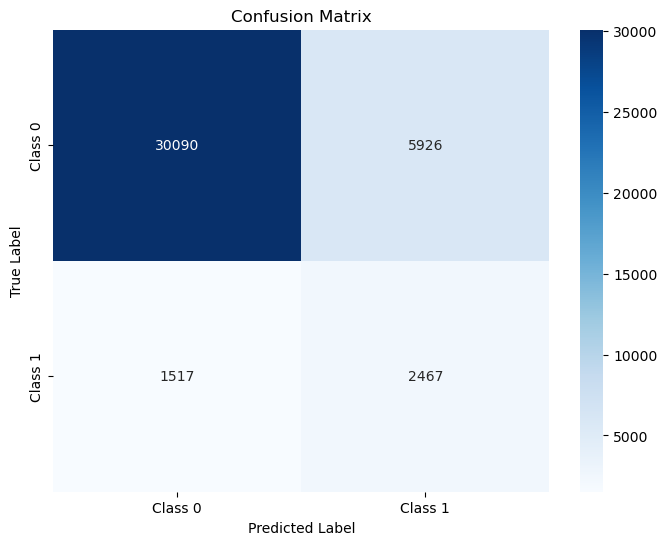

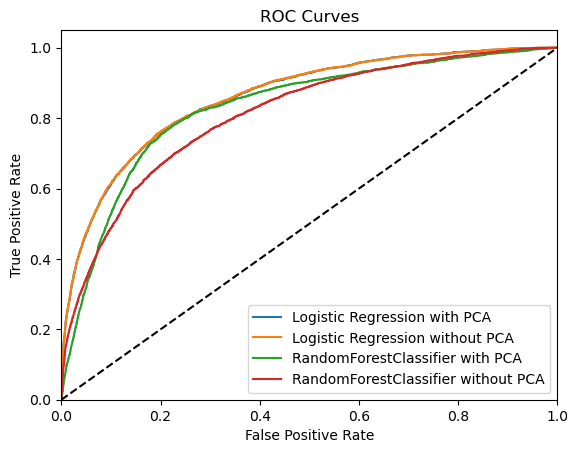

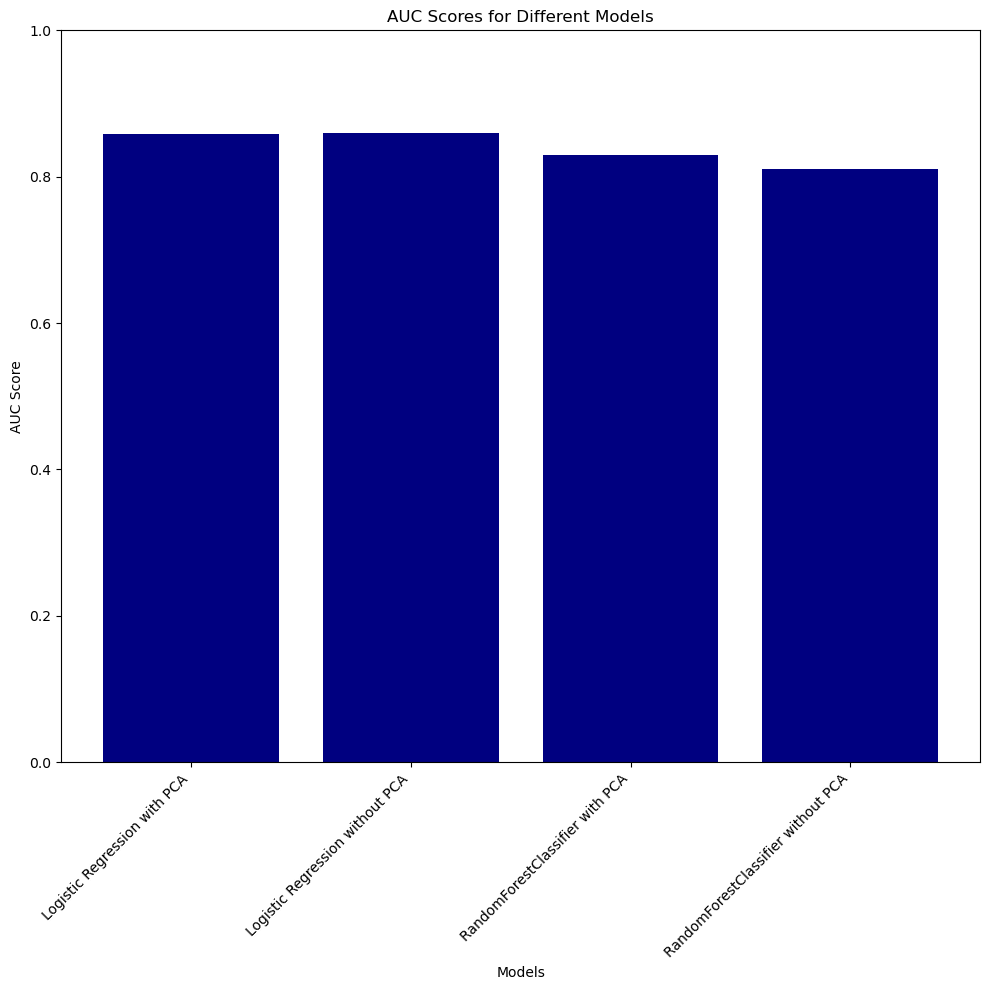

In [21]:
#RandomForest without PCA

randomForestClassifier_wopca = RandomForestClassifier(
    random_state=0,
    max_features='sqrt',
    max_depth=10,
    n_jobs=-1,
    n_estimators=300,
    class_weight={0: 1, 1: 10}  
)
randomForestClassifier_wopca.fit(x_train, y_train)
rf_y_pred_wopca = randomForestClassifier_wopca.predict(x_test)
rf_y_proba_wopca = randomForestClassifier_wopca.predict_proba(x_test)[:, 1]


rf_confusion_matrix_wopca = confusion_matrix(y_test, rf_y_pred_wopca)
rf_accuracy_wopca = accuracy_score(y_test, rf_y_pred_wopca)
rf_precision_wopca = precision_score(y_test, rf_y_pred_wopca)
rf_recall_wopca = recall_score(y_test, rf_y_pred_wopca)
rf_f1_wopca = f1_score(y_test, rf_y_pred_wopca)
roc_auc_wopca = roc_auc_score(y_test, rf_y_proba_wopca)


print("Random Forest ROC-AUC: ", roc_auc_wopca)
print(classification_report(y_test, rf_y_pred_wopca))

plot_confusion_matrix(rf_confusion_matrix_wopca)
plot_roc_curve(y_test, rf_y_proba_wopca, 'RandomForestClassifier without PCA')
plot_auc_bar_chart(roc_auc_wopca, 'RandomForestClassifier without PCA')



In [22]:
importances = randomForestClassifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.447622)
2. feature 55 (0.005228)
3. feature 7 (0.004429)
4. feature 33 (0.004370)
5. feature 152 (0.004367)
6. feature 31 (0.004242)
7. feature 129 (0.003997)
8. feature 97 (0.003953)
9. feature 81 (0.003922)
10. feature 106 (0.003875)
11. feature 116 (0.003868)
12. feature 94 (0.003863)
13. feature 75 (0.003764)
14. feature 114 (0.003588)
15. feature 6 (0.003581)
16. feature 139 (0.003566)
17. feature 50 (0.003537)
18. feature 84 (0.003528)
19. feature 43 (0.003511)
20. feature 169 (0.003507)
21. feature 76 (0.003492)
22. feature 72 (0.003480)
23. feature 107 (0.003454)
24. feature 130 (0.003437)
25. feature 178 (0.003429)
26. feature 138 (0.003401)
27. feature 91 (0.003383)
28. feature 164 (0.003370)
29. feature 69 (0.003368)
30. feature 38 (0.003327)
31. feature 140 (0.003323)
32. feature 18 (0.003322)
33. feature 92 (0.003306)
34. feature 95 (0.003275)
35. feature 86 (0.003273)
36. feature 177 (0.003261)
37. feature 103 (0.003260)
38. feature 2 (0.0

IndexError: index 190 is out of bounds for axis 0 with size 190

In [ ]:
importances = randomForestClassifier_wopca.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 81 (0.041823)
2. feature 139 (0.031537)
3. feature 12 (0.026521)
4. feature 110 (0.022649)
5. feature 174 (0.021906)
6. feature 146 (0.020744)
7. feature 6 (0.020634)
8. feature 26 (0.020550)
9. feature 53 (0.020135)
10. feature 166 (0.018361)
11. feature 22 (0.017765)
12. feature 109 (0.015516)
13. feature 76 (0.015078)
14. feature 21 (0.014177)
15. feature 198 (0.014169)
16. feature 2 (0.014044)
17. feature 148 (0.013445)
18. feature 78 (0.012767)
19. feature 99 (0.012762)
20. feature 44 (0.012704)
21. feature 80 (0.012422)
22. feature 190 (0.012116)
23. feature 179 (0.011962)
24. feature 133 (0.011695)
25. feature 40 (0.011267)
26. feature 165 (0.011097)
27. feature 0 (0.010829)
28. feature 164 (0.010758)
29. feature 170 (0.010612)
30. feature 13 (0.010147)
31. feature 34 (0.009948)
32. feature 1 (0.009637)
33. feature 177 (0.008964)
34. feature 154 (0.008787)
35. feature 94 (0.008317)
36. feature 92 (0.008235)
37. feature 115 (0.007730)
38. feature 33 (0